# Building a NLP model for the abcnews df for comparision

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
import nltk
import ssl
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package wordnet to C:\Users\Nadine
[nltk_data]     Kleine\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Importing the dataframe

In [2]:
data_abc = pd.read_csv('abcnews-date-text.csv')

In [3]:
data_abc_ml = data_abc.copy()

In [4]:
data_abc_ml.head()

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers


## Cleaning the dataframe

### Split the column "publish_date;headline_text"

In [5]:
#data_abc_ml[['publish_date','headline']] = data_abc_ml['publish_date;headline_text'].str.split(";",expand=True,)

In [6]:
data_abc_ml.tail(30)

,publish_date,headline_text
1244154,20211231,darwin residents left in shock after earthquake
1244155,20211231,disability group homes traverse the next stage of
1244156,20211231,dr kerryn phelps on navigating covid 19
1244157,20211231,federal government changes testing rules for
1244158,20211231,fireworks displays explode in skies on australias
1244159,20211231,growing concern as covid infections explode ac...
1244160,20211231,health workers bracing for busy covid wards
1244161,20211231,ichi ban wins sydney to hobart handicap honours
1244162,20211231,israel approves a fourth dose of the pfizer
1244163,20211231,israel approves fourth dose of pfizer vaccine to


In [7]:
#data_abc_ml = data_abc_ml.drop(['publish_date;headline_text'], axis=1)

### Changing the datatype of "publish_date" to datetime

In [8]:
data_abc_ml['publish_date'].dtype

dtype('int64')

In [9]:
data_abc_ml.isna().sum()

publish_date     0
headline_text    0
dtype: int64

In [10]:
data_abc_ml['publish_date'] = data_abc_ml['publish_date'].astype(str)

In [11]:
data_abc_ml['publish_date'] = pd.to_datetime(data_abc_ml['publish_date'], format='%Y%m%d')

In [12]:
data_abc_ml['publish_date'].dtype

dtype('<M8[ns]')

In [13]:
data_abc_ml.head()

,publish_date,headline_text
0,2003-02-19,aba decides against community broadcasting lic...
1,2003-02-19,act fire witnesses must be aware of defamation
2,2003-02-19,a g calls for infrastructure protection summit
3,2003-02-19,air nz staff in aust strike for pay rise
4,2003-02-19,air nz strike to affect australian travellers


In [14]:
data_abc_ml.shape

(1244184, 2)

## Add columns 'month' and 'year'

In [15]:
data_abc_ml['month'] = pd.DatetimeIndex(data_abc_ml['publish_date']).month 
   
data_abc_ml['year'] = pd.DatetimeIndex(data_abc_ml['publish_date']).year 

In [16]:
data_abc_ml.tail()

,publish_date,headline_text,month,year
1244179,2021-12-31,two aged care residents die as state records 2...,12,2021
1244180,2021-12-31,victoria records 5;919 new cases and seven deaths,12,2021
1244181,2021-12-31,wa delays adopting new close contact definition,12,2021
1244182,2021-12-31,western ringtail possums found badly dehydrate...,12,2021
1244183,2021-12-31,what makes you a close covid contact here are ...,12,2021


In [17]:
data_abc_ml['month'].dtype

dtype('int64')

In [18]:
data_abc_ml = data_abc_ml.loc[((data_abc_ml['month'] <= 10) & (data_abc_ml['year'] == 2021)) | (data_abc_ml['year'] == 2020) | (data_abc_ml['year'] == 2019) |(data_abc_ml['year'] == 2018) | ((data_abc_ml['month'] >= 11) & (data_abc_ml['year'] == 2017))]

In [19]:
data_abc_ml.head()

,publish_date,headline_text,month,year
1104727,2017-11-01,aaron pajich murder trial verdict,11,2017
1104728,2017-11-01,adani coal mine townsville city council under ...,11,2017
1104729,2017-11-01,adelaide lightning basketball team top of the ...,11,2017
1104730,2017-11-01,aerial vision shows aftermath of manhattan ter...,11,2017
1104731,2017-11-01,afl stars describe life in the football spotlight,11,2017


In [20]:
data_abc_ml['year'].value_counts(dropna=False)

2020    40240
2018    40102
2019    34060
2021    15864
2017     7129
Name: year, dtype: int64

In [21]:
data_abc_ml.shape

(137395, 4)

In [22]:
data_abc_ml = data_abc_ml.reset_index()

In [23]:
del data_abc_ml['index']

## Building the column pub_year for later comparision

In [24]:
new_list = []
for i in range(len(data_abc_ml)):
    if ((data_abc_ml['month'][i] <= 10) & (data_abc_ml['year'][i] == 2021)) | (data_abc_ml['month'][i] >= 11) & (data_abc_ml['year'][i] == 2020):
        new_list.append(2)
    elif ((data_abc_ml['month'][i] <= 10) & (data_abc_ml['year'][i] == 2020)) | (data_abc_ml['month'][i] >= 11) & (data_abc_ml['year'][i] == 2019):
        new_list.append(3)
    elif ((data_abc_ml['month'][i] <= 10) & (data_abc_ml['year'][i] == 2019)) | (data_abc_ml['month'][i] >= 11) & (data_abc_ml['year'][i] == 2018):
        new_list.append(4)
    else:
        new_list.append(5)
        
print(new_list)
len(new_list)

[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 

137395

In [25]:
pub_year = pd.DataFrame({'pub_year' : new_list})

In [26]:
data_abc_ml = pd.concat([data_abc_ml, pub_year], axis=1)

In [27]:
data_abc_ml.head()

,publish_date,headline_text,month,year,pub_year
0,2017-11-01,aaron pajich murder trial verdict,11,2017,5
1,2017-11-01,adani coal mine townsville city council under ...,11,2017,5
2,2017-11-01,adelaide lightning basketball team top of the ...,11,2017,5
3,2017-11-01,aerial vision shows aftermath of manhattan ter...,11,2017,5
4,2017-11-01,afl stars describe life in the football spotlight,11,2017,5


In [28]:
data_abc_ml.tail()

,publish_date,headline_text,month,year,pub_year
137390,2021-10-31,police dig up backyard of askew family home in...,10,2021,2
137391,2021-10-31,scott morrison faces emmanuel macron for first,10,2021,2
137392,2021-10-31,straw houses: turning a waste product into,10,2021,2
137393,2021-10-31,what is cop26 and why should we care,10,2021,2
137394,2021-10-31,work safe: one simple tip that could save live...,10,2021,2


## Building the NLP model

### Tokenization

In [29]:
def tokenizer_and_remove_punctuation(x):
  tokens = word_tokenize(x['headline_text'])
  return [word.lower() for word in tokens if word.isalpha()]

data_abc_ml['tokenized'] = data_abc_ml.apply(tokenizer_and_remove_punctuation,axis=1)
data_abc_ml.head()

,publish_date,headline_text,month,year,pub_year,tokenized
0,2017-11-01,aaron pajich murder trial verdict,11,2017,5,"[aaron, pajich, murder, trial, verdict]"
1,2017-11-01,adani coal mine townsville city council under ...,11,2017,5,"[adani, coal, mine, townsville, city, council,..."
2,2017-11-01,adelaide lightning basketball team top of the ...,11,2017,5,"[adelaide, lightning, basketball, team, top, o..."
3,2017-11-01,aerial vision shows aftermath of manhattan ter...,11,2017,5,"[aerial, vision, shows, aftermath, of, manhatt..."
4,2017-11-01,afl stars describe life in the football spotlight,11,2017,5,"[afl, stars, describe, life, in, the, football..."


### Lemmatizing

In [30]:
nltk.download('averaged_perceptron_tagger')

tag_dict = {"J": wordnet.ADJ, 
            "N": wordnet.NOUN,
            "V": wordnet.VERB,
            "R": wordnet.ADV}

def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper() 
    return tag_dict.get(tag, wordnet.NOUN) 

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Nadine Kleine\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [31]:
lemmatizer = WordNetLemmatizer() 

def lemmatizer_with_pos(row):
  return [lemmatizer.lemmatize(word,get_wordnet_pos(word)) for word in row['tokenized']]

data_abc_ml['lemmatized'] = data_abc_ml.apply(lemmatizer_with_pos,axis=1)
data_abc_ml.head()

,publish_date,headline_text,month,year,pub_year,tokenized,lemmatized
0,2017-11-01,aaron pajich murder trial verdict,11,2017,5,"[aaron, pajich, murder, trial, verdict]","[aaron, pajich, murder, trial, verdict]"
1,2017-11-01,adani coal mine townsville city council under ...,11,2017,5,"[adani, coal, mine, townsville, city, council,...","[adani, coal, mine, townsville, city, council,..."
2,2017-11-01,adelaide lightning basketball team top of the ...,11,2017,5,"[adelaide, lightning, basketball, team, top, o...","[adelaide, lightning, basketball, team, top, o..."
3,2017-11-01,aerial vision shows aftermath of manhattan ter...,11,2017,5,"[aerial, vision, shows, aftermath, of, manhatt...","[aerial, vision, show, aftermath, of, manhatta..."
4,2017-11-01,afl stars describe life in the football spotlight,11,2017,5,"[afl, stars, describe, life, in, the, football...","[afl, star, describe, life, in, the, football,..."


### Removing Stopwords (english)

In [32]:
def remove_sw(row):
  return [word for word in row['lemmatized'] if not word in stopwords.words('english')]

data_abc_ml['no_stopwords'] = data_abc_ml.apply(remove_sw,axis=1)
data_abc_ml.head()

,publish_date,headline_text,month,year,pub_year,tokenized,lemmatized,no_stopwords
0,2017-11-01,aaron pajich murder trial verdict,11,2017,5,"[aaron, pajich, murder, trial, verdict]","[aaron, pajich, murder, trial, verdict]","[aaron, pajich, murder, trial, verdict]"
1,2017-11-01,adani coal mine townsville city council under ...,11,2017,5,"[adani, coal, mine, townsville, city, council,...","[adani, coal, mine, townsville, city, council,...","[adani, coal, mine, townsville, city, council,..."
2,2017-11-01,adelaide lightning basketball team top of the ...,11,2017,5,"[adelaide, lightning, basketball, team, top, o...","[adelaide, lightning, basketball, team, top, o...","[adelaide, lightning, basketball, team, top, t..."
3,2017-11-01,aerial vision shows aftermath of manhattan ter...,11,2017,5,"[aerial, vision, shows, aftermath, of, manhatt...","[aerial, vision, show, aftermath, of, manhatta...","[aerial, vision, show, aftermath, manhattan, t..."
4,2017-11-01,afl stars describe life in the football spotlight,11,2017,5,"[afl, stars, describe, life, in, the, football...","[afl, star, describe, life, in, the, football,...","[afl, star, describe, life, football, spotlight]"


### Reducing the words to the most common 1000

In [33]:
def re_blob(row):
  return " ".join(row['no_stopwords'])

data_abc_ml['clean_blob'] = data_abc_ml.apply(re_blob,axis=1)
data_abc_ml.head()

,publish_date,headline_text,month,year,pub_year,tokenized,lemmatized,no_stopwords,clean_blob
0,2017-11-01,aaron pajich murder trial verdict,11,2017,5,"[aaron, pajich, murder, trial, verdict]","[aaron, pajich, murder, trial, verdict]","[aaron, pajich, murder, trial, verdict]",aaron pajich murder trial verdict
1,2017-11-01,adani coal mine townsville city council under ...,11,2017,5,"[adani, coal, mine, townsville, city, council,...","[adani, coal, mine, townsville, city, council,...","[adani, coal, mine, townsville, city, council,...",adani coal mine townsville city council fire a...
2,2017-11-01,adelaide lightning basketball team top of the ...,11,2017,5,"[adelaide, lightning, basketball, team, top, o...","[adelaide, lightning, basketball, team, top, o...","[adelaide, lightning, basketball, team, top, t...",adelaide lightning basketball team top table
3,2017-11-01,aerial vision shows aftermath of manhattan ter...,11,2017,5,"[aerial, vision, shows, aftermath, of, manhatt...","[aerial, vision, show, aftermath, of, manhatta...","[aerial, vision, show, aftermath, manhattan, t...",aerial vision show aftermath manhattan terror ...
4,2017-11-01,afl stars describe life in the football spotlight,11,2017,5,"[afl, stars, describe, life, in, the, football...","[afl, star, describe, life, in, the, football,...","[afl, star, describe, life, football, spotlight]",afl star describe life football spotlight


In [34]:
bow_vect = CountVectorizer(max_features=1000)

X = bow_vect.fit_transform(data_abc_ml['clean_blob']).toarray()

In [35]:
data_model2 = pd.DataFrame(X,columns=bow_vect.get_feature_names())
data_model2.head(50)

C:\Users\Nadine Kleine\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abc,aboriginal,abuse,access,accident,accuse,across,act,action,activist,...,work,worker,world,would,year,york,young,youth,zealand,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
data_model2.shape

(137395, 1000)

## Building Cluster

In [38]:
import matplotlib.pyplot as plt

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from matplotlib.lines import Line2D
from sklearn.cluster import KMeans

In [39]:
from sklearn import cluster
kmeans = cluster.KMeans(n_clusters=6,random_state=100)
kmeans.fit(X)
pred = kmeans.predict(X)

### Finding k with elbow

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

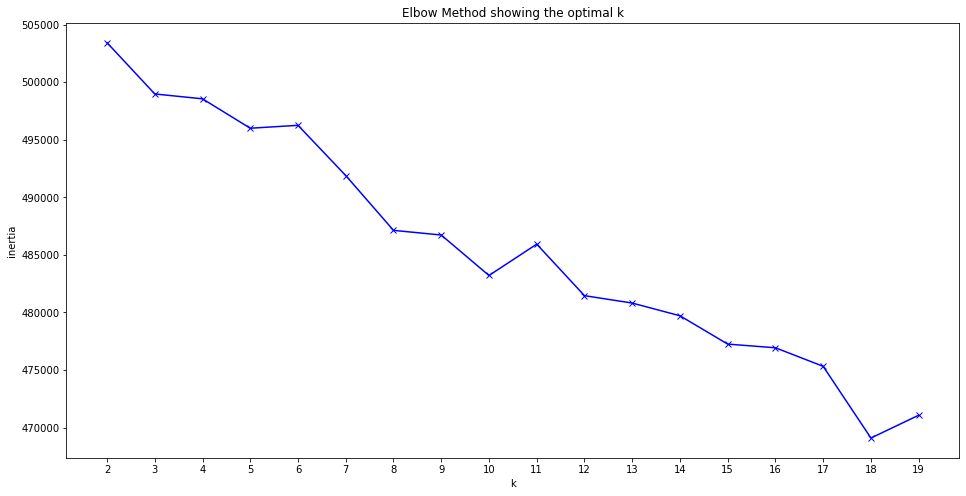

In [40]:
K = range(2, 20) #NC:  2 to 19 clusters
inertia = [] # NC: list of inertia numbers

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

In [ ]:
# elbow shows 6, 8  or 10 as optimal k

### Finding k with silhouette

Text(0.5, 1.0, 'Silhouette score showing the optimal k')

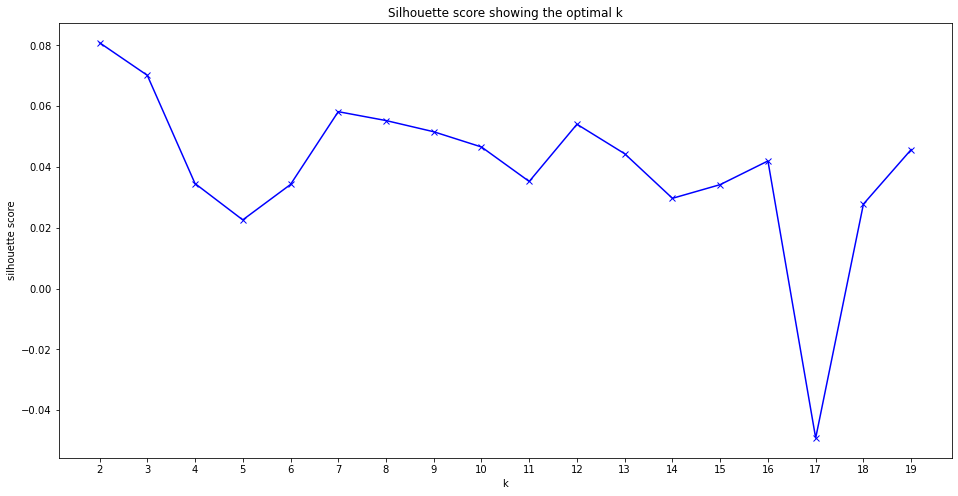

In [42]:
from sklearn.metrics import silhouette_score
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X)
    silhouette.append(silhouette_score(X, kmeans.predict(X)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette score showing the optimal k')

In [ ]:
# silhouette shows 2 or 7 as optimal k

### --> choosing 7 as optimal k!

In [43]:
kmeans = cluster.KMeans(n_clusters=7,random_state=100)
kmeans.fit(X)
pred = kmeans.predict(X)

In [44]:
data_abc = pd.concat([data_abc_ml, pd.DataFrame(pred,columns=['cluster'])],axis=1)
data_abc.head(30)

,publish_date,headline_text,month,year,pub_year,tokenized,lemmatized,no_stopwords,clean_blob,cluster
0,2017-11-01,aaron pajich murder trial verdict,11,2017,5,"[aaron, pajich, murder, trial, verdict]","[aaron, pajich, murder, trial, verdict]","[aaron, pajich, murder, trial, verdict]",aaron pajich murder trial verdict,3
1,2017-11-01,adani coal mine townsville city council under ...,11,2017,5,"[adani, coal, mine, townsville, city, council,...","[adani, coal, mine, townsville, city, council,...","[adani, coal, mine, townsville, city, council,...",adani coal mine townsville city council fire a...,1
2,2017-11-01,adelaide lightning basketball team top of the ...,11,2017,5,"[adelaide, lightning, basketball, team, top, o...","[adelaide, lightning, basketball, team, top, o...","[adelaide, lightning, basketball, team, top, t...",adelaide lightning basketball team top table,3
3,2017-11-01,aerial vision shows aftermath of manhattan ter...,11,2017,5,"[aerial, vision, shows, aftermath, of, manhatt...","[aerial, vision, show, aftermath, of, manhatta...","[aerial, vision, show, aftermath, manhattan, t...",aerial vision show aftermath manhattan terror ...,3
4,2017-11-01,afl stars describe life in the football spotlight,11,2017,5,"[afl, stars, describe, life, in, the, football...","[afl, star, describe, life, in, the, football,...","[afl, star, describe, life, football, spotlight]",afl star describe life football spotlight,3
5,2017-11-01,a history of disrespect atop uluru,11,2017,5,"[a, history, of, disrespect, atop, uluru]","[a, history, of, disrespect, atop, uluru]","[history, disrespect, atop, uluru]",history disrespect atop uluru,3
6,2017-11-01,alfred impiccatore sex abuse trial closings,11,2017,5,"[alfred, impiccatore, sex, abuse, trial, closi...","[alfred, impiccatore, sex, abuse, trial, closing]","[alfred, impiccatore, sex, abuse, trial, closing]",alfred impiccatore sex abuse trial closing,3
7,2017-11-01,a look at life on a rock lobster boat,11,2017,5,"[a, look, at, life, on, a, rock, lobster, boat]","[a, look, at, life, on, a, rock, lobster, boat]","[look, life, rock, lobster, boat]",look life rock lobster boat,3
8,2017-11-01,an all female naval crew from india has docked...,11,2017,5,"[an, all, female, naval, crew, from, india, ha...","[an, all, female, naval, crew, from, india, ha...","[female, naval, crew, india, docked, fremantle]",female naval crew india docked fremantle,3
9,2017-11-01,angler pleads with litterbugs after finding pi...,11,2017,5,"[angler, pleads, with, litterbugs, after, find...","[angler, pleads, with, litterbug, after, find,...","[angler, pleads, litterbug, find, pinch, pike]",angler pleads litterbug find pinch pike,3


In [45]:
data_abc['cluster'].value_counts(dropna=False)

3    115508
4      8731
5      4655
0      3819
6      3387
1       702
2       593
Name: cluster, dtype: int64

## Exploring clusters:

In [46]:
pd.set_option("display.max_rows", None)

In [ ]:
data_abc[data_abc['cluster']==6]

In [ ]:
# Cluster 0: police, mostly in Australia, but also international

In [ ]:
# Cluster 1: council in Australia

In [ ]:
# Cluster 2: sexual misconduct, sexual harassment, international (sports, politics, celebraties) # metoo debate!

In [ ]:
# Cluster 3: very mixed, hard to tell

In [ ]:
# Cluster 4: Corona

In [ ]:
# Cluster 5: Australia: Manus Island, Aboriginal, cricket, Australian politics & economy, Australian affairs

In [ ]:
# Cluster 6: Trump, US and world politics under Trump

### Conclusion of the headline_text Cluster:

In [ ]:
# in descending order:

# Cluster 3 (115508): Wild Mix
# Cluster 4 (8731): Corona
# Cluster 5 (4655): Manus Island, Aboriginal, cricket, Australian politics & economy, Australian affairs
# Cluster 0 (3819): Police (mostly Australia)
# Cluster 6 (3387): Trump
# Cluster 1 (702): Council, Australia
# Cluster 2 (593): sexual harassment, misconduct - international (#metoo?)

In [60]:
data_abc.head()

,publish_date,headline_text,month,year,pub_year,tokenized,lemmatized,no_stopwords,clean_blob,cluster
0,2017-11-01,aaron pajich murder trial verdict,11,2017,5,"[aaron, pajich, murder, trial, verdict]","[aaron, pajich, murder, trial, verdict]","[aaron, pajich, murder, trial, verdict]",aaron pajich murder trial verdict,3
1,2017-11-01,adani coal mine townsville city council under ...,11,2017,5,"[adani, coal, mine, townsville, city, council,...","[adani, coal, mine, townsville, city, council,...","[adani, coal, mine, townsville, city, council,...",adani coal mine townsville city council fire a...,1
2,2017-11-01,adelaide lightning basketball team top of the ...,11,2017,5,"[adelaide, lightning, basketball, team, top, o...","[adelaide, lightning, basketball, team, top, o...","[adelaide, lightning, basketball, team, top, t...",adelaide lightning basketball team top table,3
3,2017-11-01,aerial vision shows aftermath of manhattan ter...,11,2017,5,"[aerial, vision, shows, aftermath, of, manhatt...","[aerial, vision, show, aftermath, of, manhatta...","[aerial, vision, show, aftermath, manhattan, t...",aerial vision show aftermath manhattan terror ...,3
4,2017-11-01,afl stars describe life in the football spotlight,11,2017,5,"[afl, stars, describe, life, in, the, football...","[afl, star, describe, life, in, the, football,...","[afl, star, describe, life, football, spotlight]",afl star describe life football spotlight,3


## Renaming some values to gain more clarity

### values in column 'cluster'

In [63]:
data_abc['cluster'].value_counts(dropna=False)

3    115508
4      8731
5      4655
0      3819
6      3387
1       702
2       593
Name: cluster, dtype: int64

In [64]:
def renameCluster(x):
    if x == 0:
        return '0_PoliceAUS'
    elif x == 1:
        return '1_CouncilAUS'    
    elif x == 2:
        return '2_SexualHarrassmentINT' 
    elif x == 3:
        return '3_Various'   
    elif x == 4:
        return '4_Covid'
    elif x == 5:
        return '5_AustralianAffairs'    
    else:
        return '6_Trump'

In [65]:
data_abc['cluster'] = list(map(renameCluster, data_abc['cluster']))

In [66]:
data_abc['cluster'].value_counts(dropna=False)

3_Various                 115508
4_Covid                     8731
5_AustralianAffairs         4655
0_PoliceAUS                 3819
6_Trump                     3387
1_CouncilAUS                 702
2_SexualHarrassmentINT       593
Name: cluster, dtype: int64

### values in column 'pub_year'

In [67]:
data_abc['pub_year'].value_counts(dropna=False)

5    41166
3    38724
4    34886
2    22619
Name: pub_year, dtype: int64

In [68]:
def renamePubYear(x):
    if x == 5:
        return '2017/2018'
    elif x == 4:
        return '2018/2019'    
    elif x == 3:
        return '2019/2020' 
    elif x == 2:
        return '2020/2021'       
    else:
        return '2021/2022'

In [69]:
data_abc['pub_year'] = list(map(renamePubYear, data_abc['pub_year']))

In [70]:
data_abc['pub_year'].value_counts(dropna=False)

2017/2018    41166
2019/2020    38724
2018/2019    34886
2020/2021    22619
Name: pub_year, dtype: int64

## Saving df as csv: 

In [71]:
data_abc.to_csv('ABC_Australia_headline_cluster.csv', index=False)

In [72]:
data_abc.shape

(137395, 10)